In [ ]:
# to do - add text content in markdown, integrate with existing ccf page on swdb 

# https://github.com/AllenSWDB/allenswdb.github.io/blob/main/databook/background/CCF.md



In [1]:
from matplotlib import pyplot as plt 
import brainglobe_atlasapi as atlasapi
from brainglobe_atlasapi import BrainGlobeAtlas


In [2]:
atlasapi.config.write_config_value('brainglobe_dir', '/data/.brainglobe') # points to allen mouse atlases pre-loaded in data folder 

atlas = BrainGlobeAtlas('allen_mouse_25um', check_latest = False) # load CCF mouse brain atlas, 25um resolution 

Let's go through a specific example.  

Starting with a coordinate in a CCF registered brain volume (this could be the location of a Neuropixels probe target or a cell feature in an anatomy dataset), we can use brainglobe_atlasapi to programmatically identify which brain structure the coordinate is in. 



In [3]:
coordinate = [289, 153, 237]


atlas.structure_from_coords(coordinate, as_acronym=True)

'MD'

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f69cf7; ">
SdV: maybe explain the order of the coordinates - e.g. is it ap/ml/dv?

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #1fa970; ">
MTS: agree with the above. also worth emphasizing that this coordinate is indices of a voxel in 25 um space.

Note that this function will output the finest parcellation that the coordinate is in. Let's unpack what this means. 

Using the get_structure_descendants and get_structure_ancestors functions, we can look at the branches related to MD. 


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f69cf7; ">
perhaps before looking at descendants/ancestors it might be worth seeing what this structure is? eg like the cell below (although pprint helps)

I might call out the id as a useful thing

In [9]:
atlas.structures["MD"]

{'acronym': 'MD', 'id': 362, 'name': 'Mediodorsal nucleus of thalamus', 'structure_id_path': [997, 8, 343, 1129, 549, 856, 444, 362], 'rgb_triplet': [255, 144, 159], 'mesh_filename': PosixPath('/data/.brainglobe/allen_mouse_25um_v1.2/meshes/362.obj'), 'mesh': None}

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f69cf7; ">
mapping the coordinates to a parcellation or brain structure will always be done at the end node of the hierarchy. It might be worth pointing that out specifically. 

In [4]:
atlas.get_structure_descendants("MD")

[]

MD has no descendants, indicating that this structure is at the end node of the hierarchy.  

Identifying the greater family of brain structures our coordinate is in can be more helpful than the finest parcellation (e.g. thalamus "TH" vs mediodorsal thalamus "MD" ). Let's look at the ancestors of MD.  


In [5]:
atlas.get_structure_ancestors("MD")

['root', 'grey', 'BS', 'IB', 'TH', 'DORpm', 'MED']

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f69cf7; ">
It could be good to relate this to the 'structure_id_path' in the structure information.

'root' = entire brain 

'MED' = next closest node in the hierarchy 

We can visualize the brain structures by generating structure masks. For example, we'll create a 2D plot of the entire brain and mask out MD and DORpm, an overarching brain structure, as different shades of grey.

In [11]:
# generate masks to see how MD is embedded in an "ancestor" structure, e.g. DORpm

mask_root = atlas.get_structure_mask("root")
mask = atlas.get_structure_mask("MD")
mask2 = atlas.get_structure_mask("DORpm")

# give each structure a different shade
mask_root[mask_root>0]=5
mask[mask>0]=2
mask2[mask2>0]=3
mask_root = mask + mask2 + mask_root

In [17]:
mask_root.shape

(528, 320, 456)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #1fa970; ">
MTS: I think seeing this shape information earlier might help!

In [16]:
mask_root.max(0).shape

(320, 456)

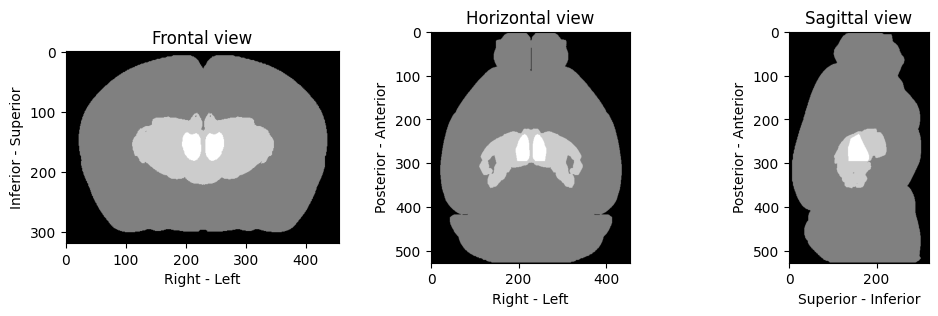

In [12]:
# to do - change the axes labels to ap, ml, dv instead 
space = atlas.space
f, axs = plt.subplots(1,3, figsize=(12, 3))
for i, (plane, labels) in enumerate(zip(space.sections, space.axis_labels)):
    axs[i].imshow(mask_root.max(i), cmap="gray")
    axs[i].set_title(f"{plane.capitalize()} view")
    axs[i].set_ylabel(labels[0])
    axs[i].set_xlabel(labels[1])


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f69cf7; ">
There's something in the plotting code I don't quite understand ... might help to unpack the atlas.space just a little bit

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #1fa970; ">
MTS: Small note - I often refer to the dimensions of the brain as medial / lateral and dorsal / ventral. This is the language used by our neurosurgery core, and is reflected in our metadata - but brainglobes seems to use right / left and superior / inferior.

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f69cf7; ">
Would it be fun to add the 'point' that we started with to this plot?

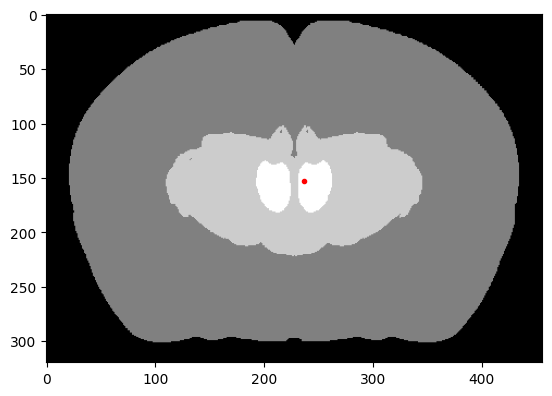

In [24]:
#a programatic way to get the coordinates would be better, but this is what I'm thinking.
#and probably doing all planes would be good...
plt.imshow(mask_root.max(0), cmap="gray")
plt.plot([237],[153],'r.')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #1fa970; ">
MTS: I might recommend flipping the order of this tutorial. Perhaps something like this: starting w/ a description of CCF space and annotations. Showing the dimensions of the 25 um annotation space, and then a slice of the annotation volume. Querying a point in that space, and then going into the hierarchical nature of the ontology.

The Allen Common Coordinate Framework (CCF) is a 3D reference atlas of the adult mouse brain. The atlas was created from a template averaging over a thousand imaged mouse brains, which allows for newly imaged brain samples to be registered for alignment to the atlas. The atlas is comprised of a 3D coordinate system spanning the brain, for which every point is uniquely annotated. These annotations describe the brain structure found at every point within the CCF coordinate space, and are arranged in a hierarchical manner. Let's demonstrate below.

In [7]:
# Let's check the dimensions of the annotation space for the 25 um atlas.
atlas.annotation.shape

(528, 320, 456)

The atlas is arranged in a 3D volume for which the anterior / posterior axis is the first dimension, the dorsal / ventral axis is the second dimension, and the medial / lateral axis is the third dimension. The origin of this space is in the anterior, dorsal, left corner of the volume.

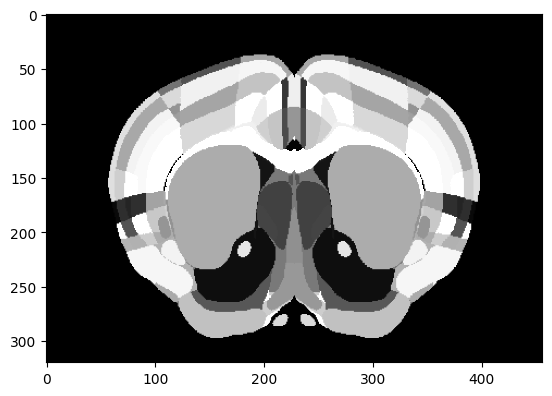

In [18]:
# Now lets plot some of the annotations within this space. Each brain structure is represented by an ID within the annotation volume. 
# We'll plot those ID numbers as numerical values here.
ap_plane = 180
plt.imshow(atlas.annotation[ap_plane,:,:], vmax = 1000, cmap = "gray")

etc etc etc